<a href='https://www.hexnbit.com/'> <img src='hexnbit.png'/> </a>

# Assignment

Mentioned below are the tasks, the solution for each tasks has to be appended by inserting a new cell below the task, along with the description of each step

### Task 1
In a single plot, plot the following:-
1. Plot Sin wave from 0-360 degrees. (Degrees on X axis and value of sin on Y axis)
2. Plot Cos wave from 45-360 degrees. (Degrees on X axis and value of cos on Y axis)
3. Add legend to the plot
4. Add Axis Labels
5. Add Plot Title as "Trigonometric Plots"
6. Add gridlines to the plot

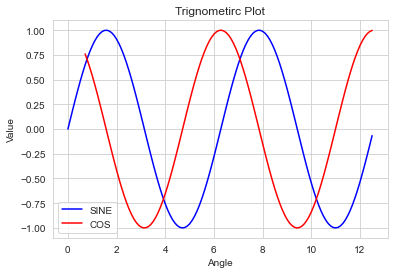

In [147]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.show()
fig, plot1 = plt.subplots(nrows=1,ncols=1)
x = np.arange(0,4*np.pi,0.1) # Start, end, step size.
y = np.sin(x)
plot1.plot(x,y,'-b',label="SINE")
z = np.arange(0.7071067,4*np.pi,0.1)
w = np.cos(z)
plot1.plot(z,w,'-r',label= 'COS')
plot1.legend(loc='lower left')
plot1.set_ylabel("Value")
plot1.set_xlabel('Angle')
plot1.set_title("Trignometirc Plot")
plot1.grid(True)

###### creating an object called figure,  <br>   generating x axis using arange function from numpy as describe in code.  <br>  and y function is it's coressponding values of trignometric function       

### Task 2
The dataset "candy-data-clean.csv" contains data for different candy / chocolate bars.
The data contains a feature named "click", this feature records that the candy / chocolate bar advertisement was clicked or not.

Perform the following:-
1. Import the dataset
2. Use the "click" feature as dependent variable / output
3. Perform Exploratory Data Analysis and make atleast 3 inference about the dataset using visual plots
4. Using logistic regression, use other features to find out the values for the "click" variable
5. Create a dataframe comparing actual values of "click" and predicted values of "click"
6. Calculate the performance metrics for the model


<AxesSubplot:xlabel='click', ylabel='count'>

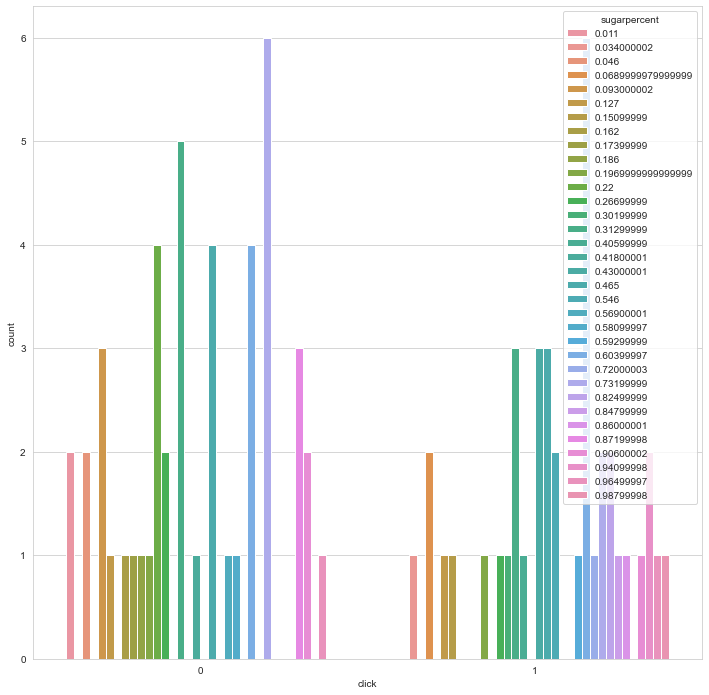

In [148]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
data1 = pd.read_csv('candy-data-clean.csv')
# data.head()
# data.info()
# Output or dependent variable is Click
data1.keys() # using to check all keys
y = data1['click']
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(x='click',hue='sugarpercent',data=data1)

###### In above figuere we can see the Number of click V/S sugar percent.<br>N0. of click is high for number of sugar percent.

<AxesSubplot:>

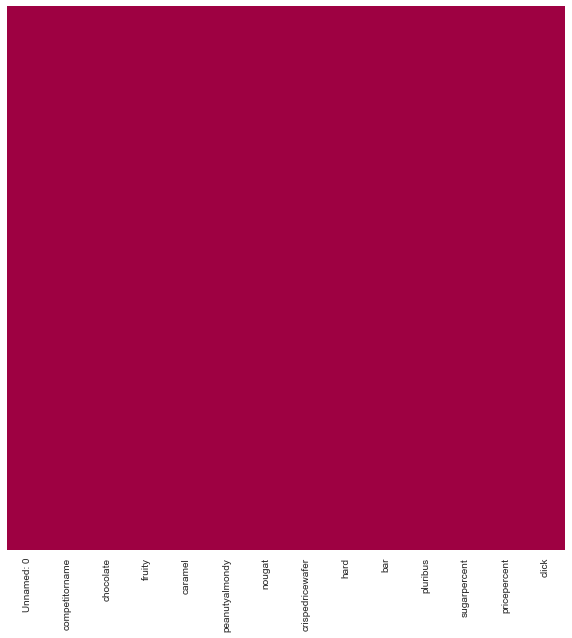

In [149]:
#Checkig for any missing values
plt.figure(figsize=(10,10))
sns.heatmap(data1.isnull(),yticklabels=False,cbar=False,cmap='Spectral')

##### As we seen in above figure there is no missing values found in data frame

<AxesSubplot:xlabel='click', ylabel='count'>

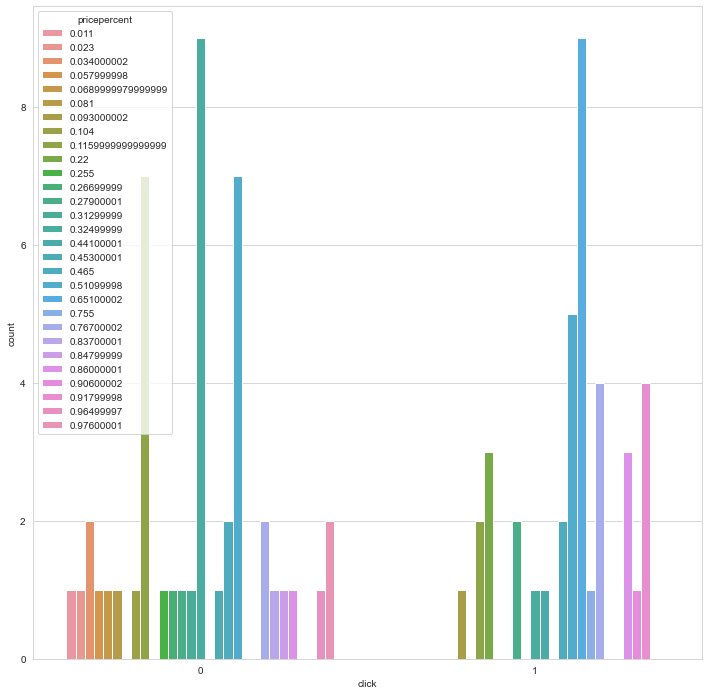

In [150]:
# Now we plotting a figure Click V/S Pricepercent 
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(x='click',hue='pricepercent',data=data1)

###### Above poltting we can see the click V/S pricepercent Variation

<AxesSubplot:>

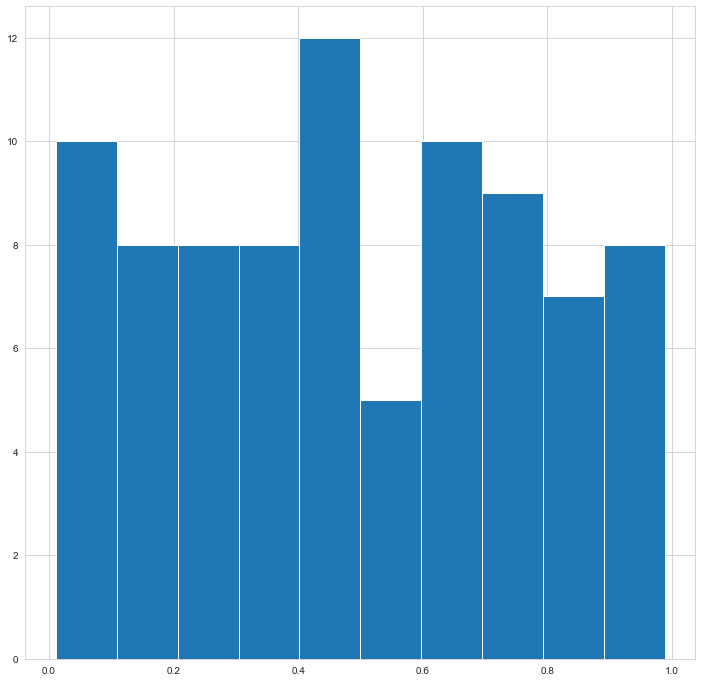

In [151]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
data1['sugarpercent'].hist()

In [152]:
# data1.describe()

###### Finding for click. <br> click is our output variable or dependent variable.

In [153]:
data1.info()
#dropting the unsused data type
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        85 non-null     int64  
 1   competitorname    85 non-null     object 
 2   chocolate         85 non-null     int64  
 3   fruity            85 non-null     int64  
 4   caramel           85 non-null     int64  
 5   peanutyalmondy    85 non-null     int64  
 6   nougat            85 non-null     int64  
 7   crispedricewafer  85 non-null     int64  
 8   hard              85 non-null     int64  
 9   bar               85 non-null     int64  
 10  pluribus          85 non-null     int64  
 11  sugarpercent      85 non-null     float64
 12  pricepercent      85 non-null     float64
 13  click             85 non-null     int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 9.4+ KB


,Unnamed: 0,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,click
0,0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,1
1,1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,1
2,2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,0
3,3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,0
4,4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,1


In [154]:
from sklearn.model_selection import train_test_split

###### Train test and split.

In [155]:
data1.drop(['competitorname'],inplace=True,axis=1) # dropping unwanted data/column

In [156]:
x_train,x_test,y_train,y_test=train_test_split(data1.drop('click',axis=1),data1['click'],test_size=0.30,random_state=101)


In [157]:
# Training and predicting model.
# my_model = LogisticRegression(max_iter=1000)
my_model = LogisticRegression()
my_model.fit(x_train,y_train)

LogisticRegression()

In [158]:
# predicting the data
predict = my_model.predict(x_test)

In [159]:
# Checking in confusion matrix
from sklearn.metrics import classification_report,confusion_matrix

In [160]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[12,  0],
       [ 6,  8]], dtype=int64)

<AxesSubplot:>

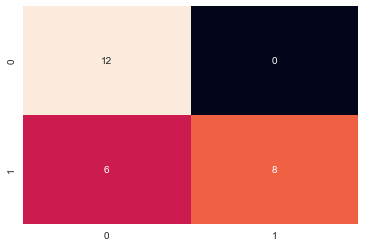

In [161]:
# Creating heatmap for cnf matrix
sns.heatmap(cnf_matrix,annot=True,fmt='g',cbar=False)

In [162]:
print(classification_report(y_test,predict))
#This is performance matrix for model
# Model efficency is below 80%

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       1.00      0.57      0.73        14

    accuracy                           0.77        26
   macro avg       0.83      0.79      0.76        26
weighted avg       0.85      0.77      0.76        26



## ACTUAL V/S Predicted

In [175]:
# print(data1['click'])
# print(predict)
i = data1.columns.get_loc('caramel') #changing the column name we select row for testing the data.
print(x_test.iloc[i])
print('predicted values: ',y_test.iloc[i]) #actual output from data set.
#here is predicted and actual values.

Unnamed: 0          51.000
chocolate            1.000
fruity               0.000
caramel              0.000
peanutyalmondy       1.000
nougat               0.000
crispedricewafer     0.000
hard                 0.000
bar                  0.000
pluribus             0.000
sugarpercent         0.034
pricepercent         0.279
Name: 51, dtype: float64
predicted values:  1


In [174]:
sample = x_test.iloc[i].to_numpy().reshape(1,-1)
predicted_res =  my_model.predict(sample)
print('Predicted result ',predicted_res)

Predicted result  [1]
